In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
data = pd.read_csv(url, header=None)

data.columns = [f'feature_{i}' for i in range(60)] + ['class']

le = LabelEncoder()
data['class_encoded'] = le.fit_transform(data['class'])

print("Dataset Shape:", data.shape)
print(data['class'].value_counts())
print(data.head())

Dataset Shape: (208, 62)
class
M    111
R     97
Name: count, dtype: int64
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     0.0200     0.0371     0.0428     0.0207     0.0954     0.0986   
1     0.0453     0.0523     0.0843     0.0689     0.1183     0.2583   
2     0.0262     0.0582     0.1099     0.1083     0.0974     0.2280   
3     0.0100     0.0171     0.0623     0.0205     0.0205     0.0368   
4     0.0762     0.0666     0.0481     0.0394     0.0590     0.0649   

   feature_6  feature_7  feature_8  feature_9  ...  feature_52  feature_53  \
0     0.1539     0.1601     0.3109     0.2111  ...      0.0065      0.0159   
1     0.2156     0.3481     0.3337     0.2872  ...      0.0089      0.0048   
2     0.2431     0.3771     0.5598     0.6194  ...      0.0166      0.0095   
3     0.1098     0.1276     0.0598     0.1264  ...      0.0036      0.0150   
4     0.1209     0.2467     0.3564     0.4459  ...      0.0054      0.0105   

   feature_54  feature_55  fe

In [3]:
print("All Column Names:")
print(data.columns.tolist())

All Column Names:
['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'class', 'class_encoded']


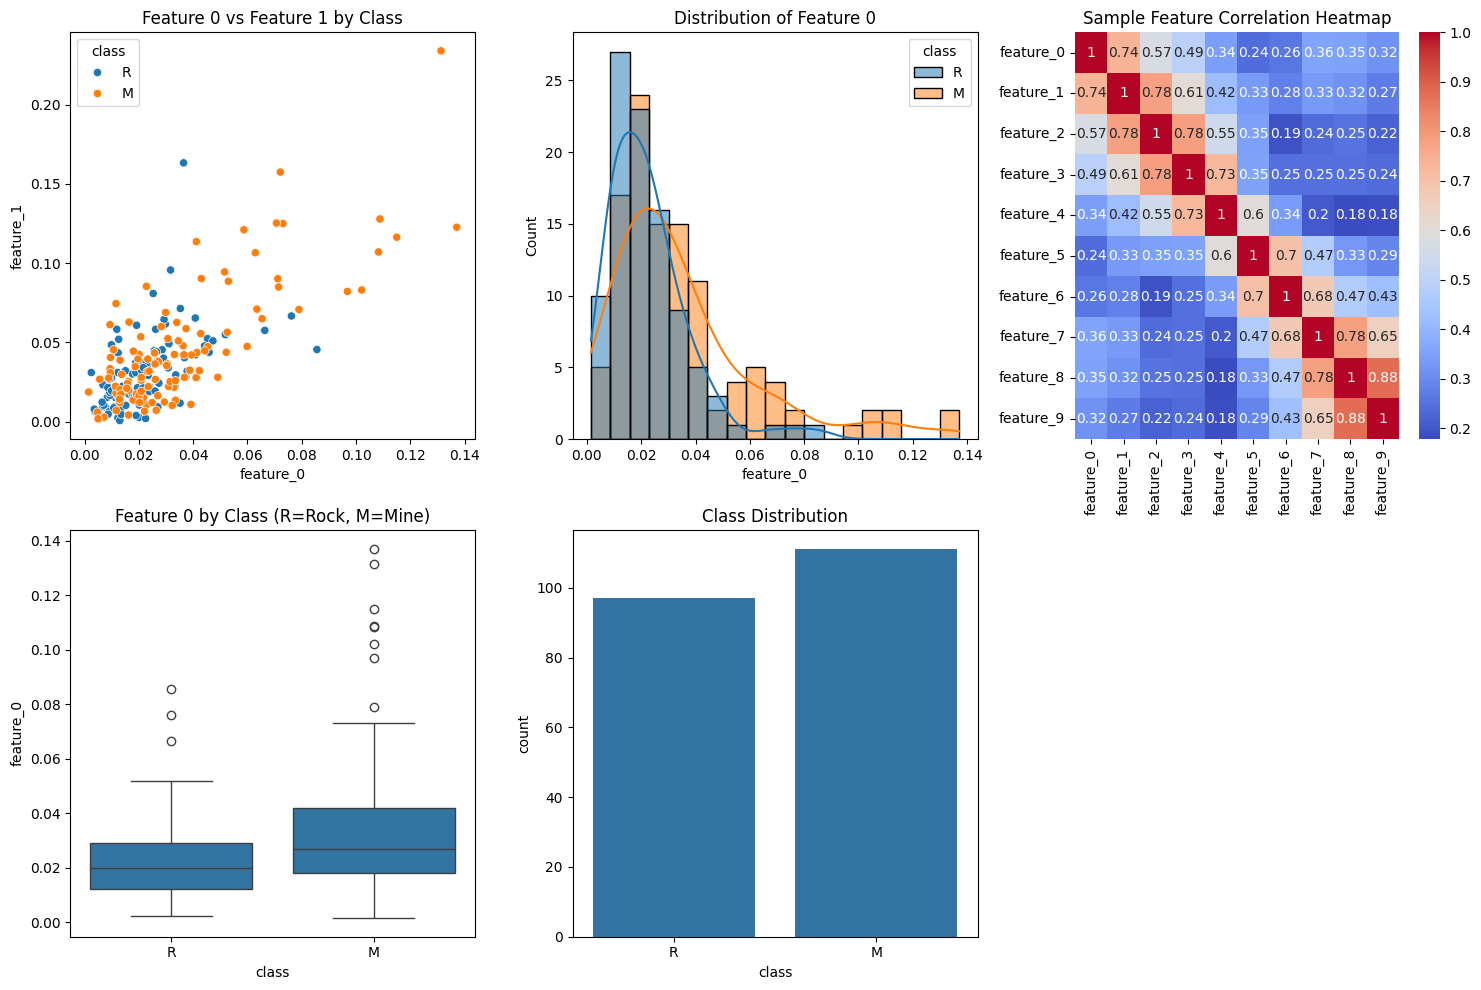

In [4]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(data=data, x='feature_0', y='feature_1', hue='class')
plt.title('Feature 0 vs Feature 1 by Class')

plt.subplot(2, 3, 2)
sns.histplot(data=data, x='feature_0', hue='class', kde=True)
plt.title('Distribution of Feature 0')

plt.subplot(2, 3, 3)
sample_corr = data.iloc[:, :10].corr()
sns.heatmap(sample_corr, annot=True, cmap='coolwarm')
plt.title('Sample Feature Correlation Heatmap')

plt.subplot(2, 3, 4)
sns.boxplot(data=data, x='class', y='feature_0')
plt.title('Feature 0 by Class (R=Rock, M=Mine)')

plt.subplot(2, 3, 5)
sns.countplot(data=data, x='class')
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

Explained Variance Ratio sum (first 20 PCs): 0.8839206823252497


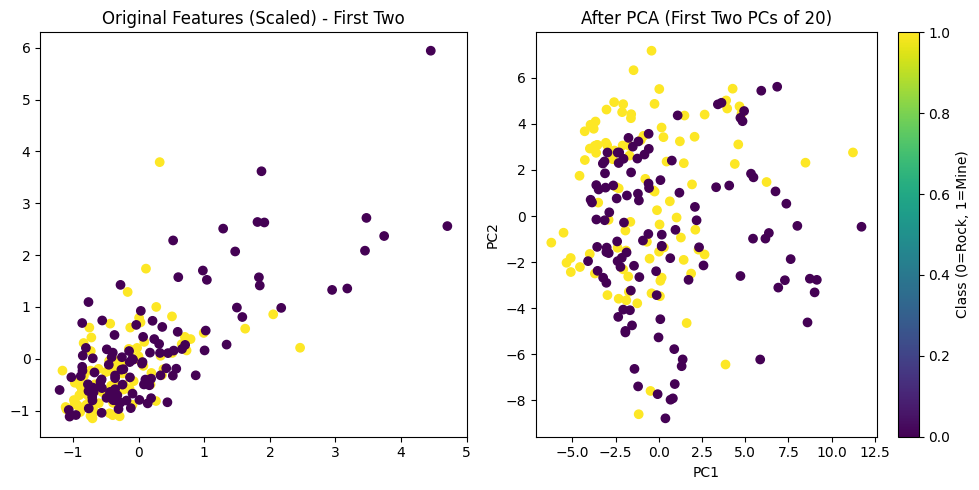

In [6]:
X = data.iloc[:, :-2].values
y = data['class_encoded'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

U, s, Vt = np.linalg.svd(X_scaled, full_matrices=False)
X_pca = np.dot(X_scaled, Vt.T[:, :20])
print("Explained Variance Ratio sum (first 20 PCs):", np.sum((s**2 / np.sum(s**2))[:20]))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.title('Original Features (Scaled) - First Two')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('After PCA (First Two PCs of 20)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Class (0=Rock, 1=Mine)')
plt.tight_layout()
plt.show()

Accuracy: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.94      0.85      0.89        20

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42

ROC AUC Score: 0.9045454545454545


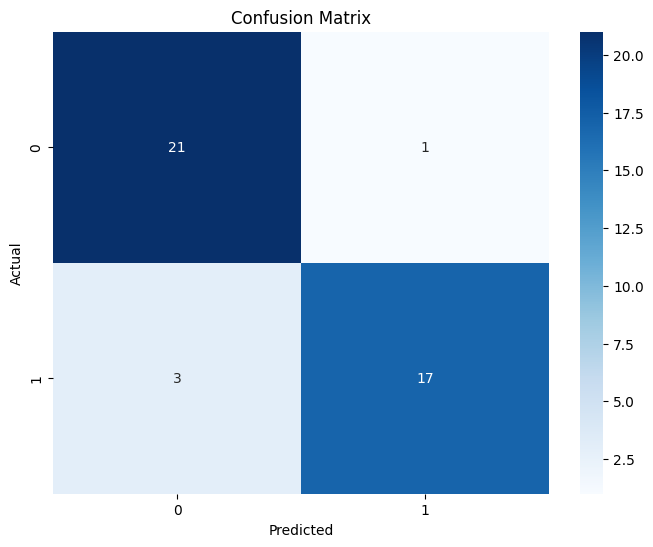

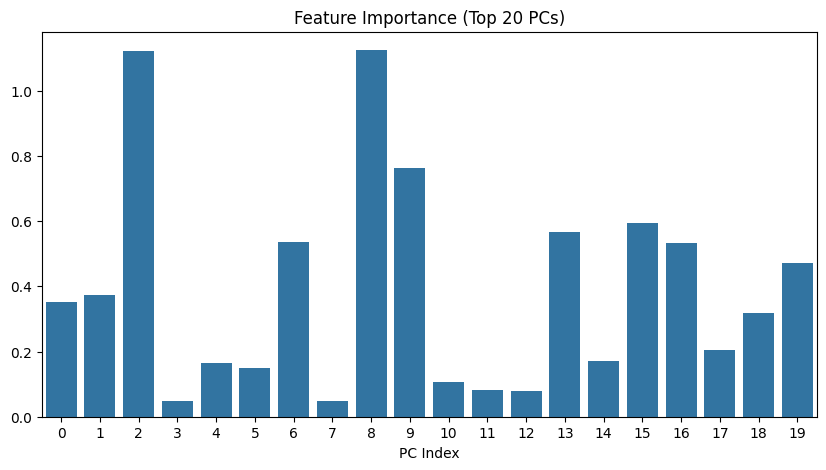

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(random_state=42, C=10, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

importance = np.abs(model.coef_).mean(axis=0)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(range(20)), y=importance)
plt.title('Feature Importance (Top 20 PCs)')
plt.xlabel('PC Index')
plt.show()

In [8]:
variance_captured = np.sum((s**2 / np.sum(s**2))[:20]) * 100
print(f"\nSummary: The model achieved {accuracy*100:.2f}% accuracy after PCA, capturing {variance_captured:.1f}% variance in 20 components. PCA reduced noise from 60 correlated sonar features, enabling fast underwater threat detection with balanced precision/recall ~0.90!")


Summary: The model achieved 90.48% accuracy after PCA, capturing 88.4% variance in 20 components. PCA reduced noise from 60 correlated sonar features, enabling fast underwater threat detection with balanced precision/recall ~0.90!
